In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [2]:
train_data_directory = r'D:\New Dataset\seg_train'
test_data_directory = r'D:\New Dataset\seg_test'

In [3]:
pred_directoty = r'D:\New Dataset\seg_pred'

In [4]:
categories = ['buildings','forest','glacier','mountain','sea','street']

In [ ]:
training_data = []
test_data = []

In [6]:
def make_data(directory,dataName):
    for category in categories:
        path = os.path.join(directory,category)
        label = categories.index(category)
        print(path)

        for img_name in os.listdir(path):
            img_path = os.path.join(path,img_name)
            img = cv2.imread(img_path)

            # img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            img = cv2.resize(img,(150,150))

            img = np.array(img, dtype = np.float32)
                
            # plt.imshow(img)
            # plt.show()
                
            if dataName == 'training':
                training_data.append([img,label])

            else:
                 test_data.append([img,label])
            

            # try : 
            #     img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            #     img = cv2.resize(img,(150,150))

            #     img = np.array(img, dtype = np.float32)
                
            #     plt.imshow(img)
            #     plt.show()
                
            #     data.append([img,label])
            #     print(len(data))

            # except Exception as e:
            #     pass
                
            # plt.imshow(img)
            # plt.show()
            
            # cv2.imshow('sdsa',img)
            # plt.show()
            # break
    if dataName == 'training':
        print(len(training_data))
        pik = open('training_dataset.pickle','wb')
        pickle.dump(training_data,pik)
        pik.close()

    else:
        print(len(test_data))
        pik = open('test_dataset.pickle','wb')
        pickle.dump(test_data,pik)
        pik.close()
    
    
        # break

    # cv2.waitKey(0)
    # cv2.destroyAllWindows()


In [7]:
make_data(train_data_directory,'training')
make_data(test_data_directory,'test')

D:\New Dataset\seg_train\buildings
D:\New Dataset\seg_train\forest
D:\New Dataset\seg_train\glacier
D:\New Dataset\seg_train\mountain
D:\New Dataset\seg_train\sea
D:\New Dataset\seg_train\street
14034
D:\New Dataset\seg_test\buildings
D:\New Dataset\seg_test\forest
D:\New Dataset\seg_test\glacier
D:\New Dataset\seg_test\mountain
D:\New Dataset\seg_test\sea
D:\New Dataset\seg_test\street
3000


In [8]:
def load_data(dataSetName):
    pick = open(dataSetName,'rb')
    data = pickle.load(pick)
    pick.close()

    np.random.shuffle(data)

    features = []
    labels = []

    for img,label in data:
        features.append(img)
        labels.append(label)

    features = np.array(features,dtype = np.float32)
    labels = np.array(labels,dtype = np.float32)

    features = features / 255.0

    return [features,labels]



In [9]:
x_train,y_train = load_data('training_dataset.pickle')
x_test , y_test = load_data('test_dataset.pickle')

3.0


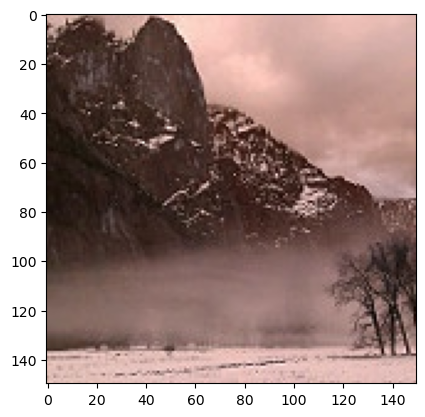

In [11]:
plt.imshow(x_train[1])
print(y_train[1])

In [12]:
x_train.shape

(14034, 150, 150, 3)

In [13]:
x_train.shape[0]

14034

In [14]:
y_train[:5]

array([3., 3., 5., 2., 5.], dtype=float32)

In [17]:
y_train = y_train.reshape(-1,)
y_train.shape

(14034,)

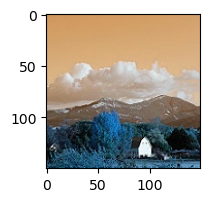

In [16]:
plt.figure(figsize = (15,2))
plt.imshow(x_test[1])

In [18]:
def plot_sample(x,y,index):
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(categories[int(y[index])]) # for labeling by name
    plt.xlabel(categories[int(y[index])])


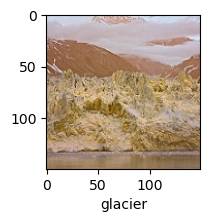

In [19]:
plot_sample(x_train,y_train,65)

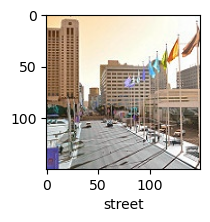

In [31]:
plot_sample(x_train,y_train,8)

In [21]:
from tensorflow.keras import datasets, layers , models
from sklearn.metrics import confusion_matrix , classification_report

In [23]:
#CNN Mode3l

#Implementation of CNN
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3),padding = 'same', activation='relu', input_shape=(150, 150, 3)), # this can detect 32 different features
    layers.MaxPooling2D(pool_size = (2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3),padding = 'same', activation='relu'),
    layers.MaxPooling2D(pool_size = (2, 2),strides = (2,2)),

    layers.Conv2D(filters=96, kernel_size=(3, 3),padding = 'same', activation='relu'),
    layers.MaxPooling2D(pool_size = (2, 2),strides = (2,2)),

    # layers.Conv2D(filters=96, kernel_size=(3, 3),padding = 'same', activation='relu'),
    # layers.MaxPooling2D(pool_size = (2, 2),strides = (2,2)),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(6, activation='softmax')
])

In [24]:
#Compile 

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



In [ ]:
import time
import tensorflow as tf

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        self.times = []

    def on_epoch_begin(self, epoch, logs=None):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs=None):
        self.times.append(time.time() - self.epoch_start_time)


In [26]:
batch_size = 100

In [27]:
steps_per_epoch = x_train.shape[0] // batch_size

In [28]:
steps_per_epoch

140

In [ ]:
time_callback = TimeHistory()
history = cnn.fit(x_train, y_train, batch_size=100, epochs=70, callbacks=[time_callback])


Epoch 1/70
141/141 ━━━━━━━━━━━━━━━━━━━━ 72s 509ms/step - accuracy: 0.8778 - loss: 0.3463
Epoch 2/70
141/141 ━━━━━━━━━━━━━━━━━━━━ 70s 498ms/step - accuracy: 0.8990 - loss: 0.2820
Epoch 3/70
141/141 ━━━━━━━━━━━━━━━━━━━━ 70s 496ms/step - accuracy: 0.9356 - loss: 0.1924
Epoch 4/70
141/141 ━━━━━━━━━━━━━━━━━━━━ 71s 506ms/step - accuracy: 0.9680 - loss: 0.1033
Epoch 5/70
141/141 ━━━━━━━━━━━━━━━━━━━━ 71s 502ms/step - accuracy: 0.9698 - loss: 0.0960
Epoch 6/70
141/141 ━━━━━━━━━━━━━━━━━━━━ 70s 498ms/step - accuracy: 0.9773 - loss: 0.0716
Epoch 7/70
141/141 ━━━━━━━━━━━━━━━━━━━━ 70s 498ms/step - accuracy: 0.9848 - loss: 0.0491
Epoch 8/70
141/141 ━━━━━━━━━━━━━━━━━━━━ 70s 499ms/step - accuracy: 0.9925 - loss: 0.0288
Epoch 9/70
141/141 ━━━━━━━━━━━━━━━━━━━━ 72s 513ms/step - accuracy: 0.9869 - loss: 0.0445
Epoch 10/70
141/141 ━━━━━━━━━━━━━━━━━━━━ 72s 507ms/step - accuracy: 0.9967 - loss: 0.0158
Epoch 11/70
141/141 ━━━━━━━━━━━━━━━━━━━━ 70s 498ms/step - accuracy: 0.9967 - loss: 0.0144
Epoch 12/70
141/141

In [39]:
# history.history['loss']
# #Save loss as pickle file
# with open("Training Loss.pkl", "wb") as file:  # "wb" means write binary
#     pickle.dump(history.history['loss'], file)

In [40]:
# history.history

In [38]:
#Save loss as pickle file
with open("Training History.pkl", "wb") as file:  # "wb" means write binary
    pickle.dump(history.history, file)

In [41]:
#Load Data

with open("Training History.pkl", "rb") as file:  # "rb" means read binary
    loaded_history = pickle.load(file)

In [34]:
#Save object as pickle file
with open("my_time_object.pkl", "wb") as file:  # "wb" means write binary
    pickle.dump(time_callback, file)

In [43]:
#Load Object folder

with open("my_time_object.pkl", "rb") as file:  # "rb" means read binary
    time_callback_object = pickle.load(file)

In [44]:
time_callback_object.times

[72.39337301254272,
 70.34744167327881,
 69.95788359642029,
 71.37235951423645,
 70.83535814285278,
 70.27080798149109,
 70.29090857505798,
 70.4824390411377,
 72.35466885566711,
 71.55551505088806,
 70.31522965431213,
 70.4668836593628,
 70.42223453521729,
 70.90916347503662,
 70.96023869514465,
 70.43687224388123,
 70.7349648475647,
 70.99851727485657,
 71.2141580581665,
 70.50740337371826,
 70.8166754245758,
 71.3185760974884,
 71.6410722732544,
 70.81334829330444,
 70.64671540260315,
 70.74548006057739,
 70.97681879997253,
 71.22089743614197,
 70.61365556716919,
 71.48241996765137,
 70.93994879722595,
 71.58596396446228,
 70.90210366249084,
 70.93637251853943,
 70.84307527542114,
 71.25073862075806,
 70.90015983581543,
 71.13688087463379,
 71.34809446334839,
 71.10424137115479,
 71.03849291801453,
 71.55862855911255,
 71.72088265419006,
 71.14858508110046,
 71.05333375930786,
 71.34620451927185,
 71.21859884262085,
 71.00255870819092,
 71.12286734580994,
 70.72523522377014,
 71.218

In [45]:
loaded_history['loss']

[0.3611353933811188,
 0.2889098525047302,
 0.18473012745380402,
 0.11315082013607025,
 0.0953899621963501,
 0.060126155614852905,
 0.04688376933336258,
 0.03157581761479378,
 0.05169243738055229,
 0.017228463664650917,
 0.019847307354211807,
 0.023815985769033432,
 0.04493129253387451,
 0.024321725592017174,
 0.03782204911112785,
 0.02110414020717144,
 0.012938959524035454,
 0.007033010013401508,
 0.007331996690481901,
 0.005460030864924192,
 0.005245772656053305,
 0.005376425571739674,
 0.005384755786508322,
 0.0039849653840065,
 0.006116985809057951,
 0.006254824344068766,
 0.004800075199455023,
 0.0036362081300467253,
 0.005075081717222929,
 0.004078949335962534,
 0.0048862118273973465,
 0.11666397005319595,
 0.07589587569236755,
 0.02040221355855465,
 0.00959800649434328,
 0.006792666390538216,
 0.004800751805305481,
 0.0031958294566720724,
 0.0028214165940880775,
 0.0031894182320684195,
 0.002584588946774602,
 0.002284081419929862,
 0.0023814134765416384,
 0.0032845749519765377,
 

In [46]:
# loaded_history['accuracy']

In [47]:
loaded_history

{'accuracy': [0.871383786201477,
  0.8964657187461853,
  0.935228705406189,
  0.9630183577537537,
  0.9694314002990723,
  0.9825423955917358,
  0.9865326881408691,
  0.9917343854904175,
  0.9848938584327698,
  0.9971497654914856,
  0.9954396486282349,
  0.9937295317649841,
  0.9866752028465271,
  0.9937295317649841,
  0.989311695098877,
  0.9944420456886292,
  0.9972922801971436,
  0.9990736842155457,
  0.9987886548042297,
  0.9990023970603943,
  0.9989311695098877,
  0.9989311695098877,
  0.9989311695098877,
  0.9990736842155457,
  0.9988598823547363,
  0.9988598823547363,
  0.9990023970603943,
  0.9990736842155457,
  0.9989311695098877,
  0.9990736842155457,
  0.9988598823547363,
  0.9615220427513123,
  0.976841926574707,
  0.9935870170593262,
  0.9980760812759399,
  0.9983611106872559,
  0.9990023970603943,
  0.9992161989212036,
  0.9991449117660522,
  0.9990023970603943,
  0.9990736842155457,
  0.9990736842155457,
  0.9990736842155457,
  0.9988598823547363,
  0.9990736842155457,
  

In [48]:
time_callback.times

[72.39337301254272,
 70.34744167327881,
 69.95788359642029,
 71.37235951423645,
 70.83535814285278,
 70.27080798149109,
 70.29090857505798,
 70.4824390411377,
 72.35466885566711,
 71.55551505088806,
 70.31522965431213,
 70.4668836593628,
 70.42223453521729,
 70.90916347503662,
 70.96023869514465,
 70.43687224388123,
 70.7349648475647,
 70.99851727485657,
 71.2141580581665,
 70.50740337371826,
 70.8166754245758,
 71.3185760974884,
 71.6410722732544,
 70.81334829330444,
 70.64671540260315,
 70.74548006057739,
 70.97681879997253,
 71.22089743614197,
 70.61365556716919,
 71.48241996765137,
 70.93994879722595,
 71.58596396446228,
 70.90210366249084,
 70.93637251853943,
 70.84307527542114,
 71.25073862075806,
 70.90015983581543,
 71.13688087463379,
 71.34809446334839,
 71.10424137115479,
 71.03849291801453,
 71.55862855911255,
 71.72088265419006,
 71.14858508110046,
 71.05333375930786,
 71.34620451927185,
 71.21859884262085,
 71.00255870819092,
 71.12286734580994,
 70.72523522377014,
 71.218

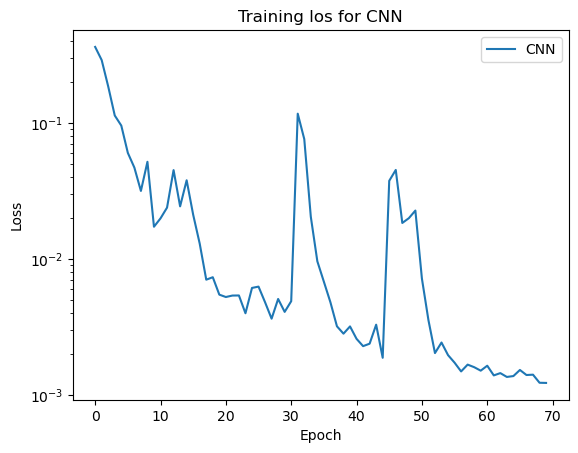

In [53]:
import matplotlib.pyplot as plt

# Plot training  loss values
plt.plot(loaded_history['loss'], label='CNN')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale("log") 
plt.title('Training los for CNN')
plt.legend()
plt.show()


In [35]:
print(type(time_callback))

<class '__main__.TimeHistory'>


In [26]:
# time_per_epoch = [76,72,72,71,73,72,72,71,70,70,73,71,71,70,70,70,71,71,70,71]

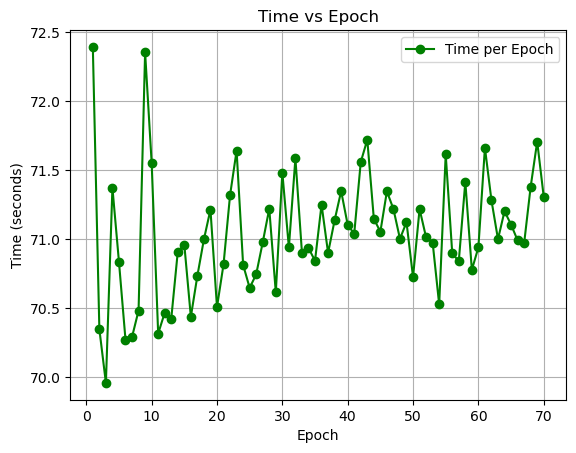

In [51]:
import matplotlib.pyplot as plt

# Epochs
epochs = range(1, 71)  # since you have 20 epochs

# Plotting Time vs Epoch
plt.plot(epochs, time_callback_object.times, marker='o', linestyle='-', color='g', label='Time per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Time (seconds)')
plt.title('Time vs Epoch')
# plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()


In [25]:
import pickle

# Assuming you already have the history object from cnn.fit()
# history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Save the history to a pickle file
with open('training_history.pkl', 'wb') as file:
    pickle.dump(history.history, file)


In [ ]:
#Load History
with open('training_history.pkl', 'rb') as file:
    loaded_history = pickle.load(file)

# You can then access loaded_history like you did with history.history
# print(loaded_history['loss'])  # Example usage


In [3]:
# import matplotlib.pyplot as plt

# # Plot training & validation loss values
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.title('Training and Validation Loss')
# plt.legend()
# plt.show()


In [23]:
#Test

cnn.evaluate(x_test,y_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.8254 - loss: 1.0819


[1.0543726682662964, 0.8203333616256714]

In [24]:
y_test[:5]

array([3., 2., 4., 5., 3.], dtype=float32)

In [25]:
y_test = y_test.reshape(-1,)

In [26]:
y_test.shape

(3000,)

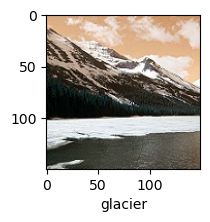

In [27]:
plot_sample(x_test,y_test,1)

In [31]:
cnn.save('CnnModel.keras')

In [44]:
prediction = cnn.predict(x_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step


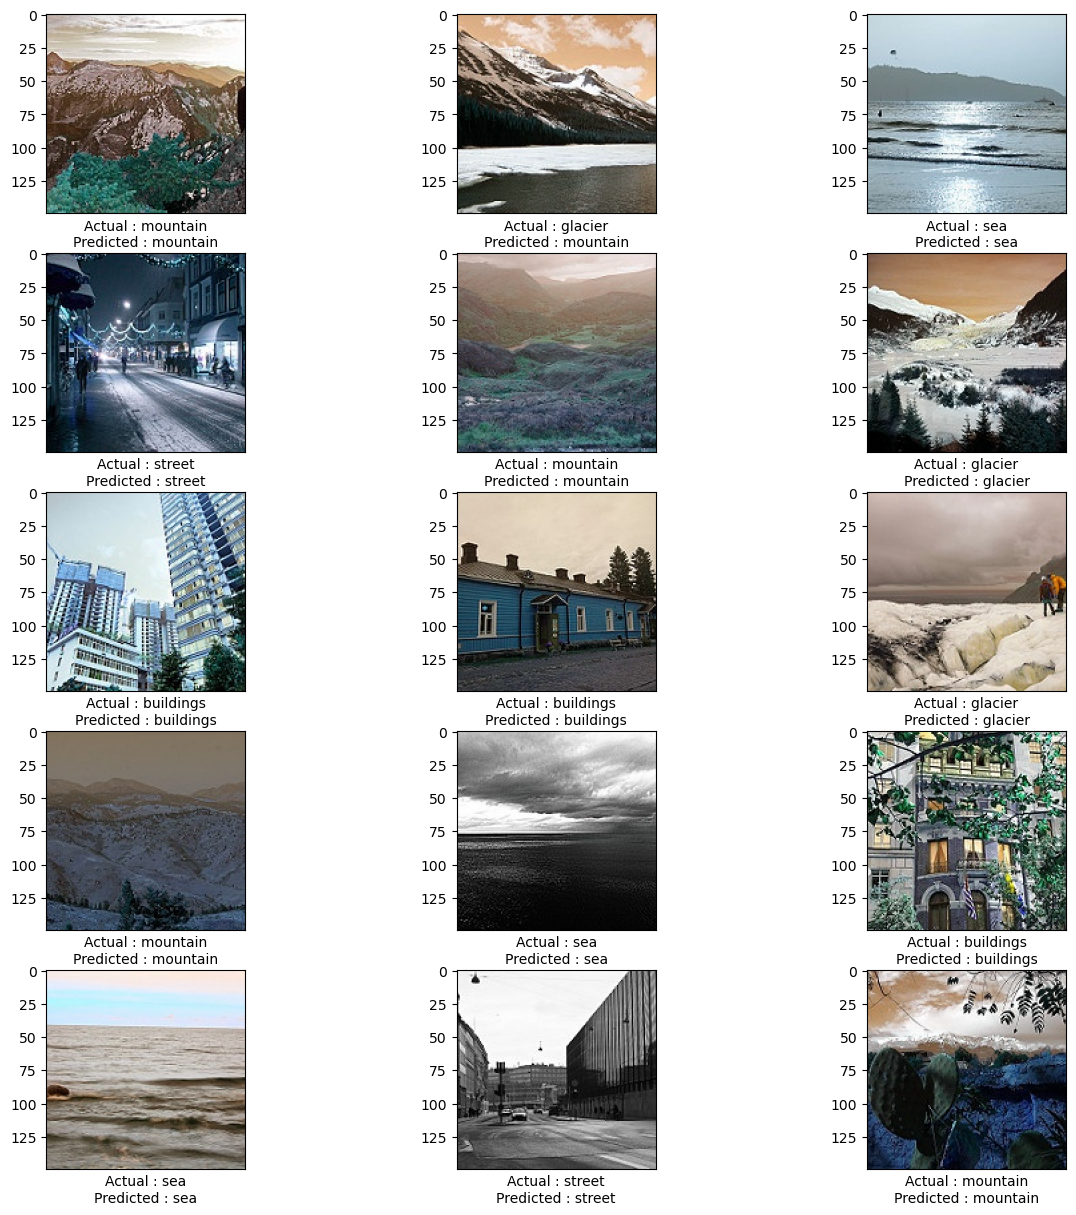

In [47]:
plt.figure(figsize=(15,15))

for i in range(15):
    plt.subplot(5,3,i+1)
    plt.xlabel('Actual : '+categories[int(y_test[i])] + '\n'+'Predicted : '+categories[np.argmax(prediction[i])])
    plt.imshow(x_test[i])
    

    plt.xticks([])

plt.show()

In [51]:
# import tensorflow as tf
# from tensorflow.keras.preprocessing import image_dataset_from_directory
# from tensorflow.keras.models import load_model
# import numpy as np
# import os

# # Define image properties
# img_height = 150  # Example height (change according to your model input)
# img_width = 150   # Example width (change according to your model input)

# # Load prediction dataset (x_pred) from directory
# prediction_dataset = image_dataset_from_directory(
#     r'D:\New Dataset\seg_pred',  # directory containing your prediction images
#     image_size=(img_height, img_width), 
#     batch_size=32,  # Set batch size as per need
#     label_mode=None  # No labels for predictions
# )

# # Preprocess: Normalize images (scaling between 0 and 1)
# prediction_dataset = prediction_dataset.map(lambda x: x / 255.0)

# # Load your trained CNN model
# cnn_model = tf.keras.models.load_model('CnnModel.keras')

# # Predict
# predictions = cnn_model.predict(prediction_dataset)

# # (Optional) If you want to extract the predicted class for each image:
# predicted_classes = np.argmax(predictions, axis=-1)

# print(predicted_classes)

In [50]:
# plt.figure(figsize=(15,15))

# for i in range(15):
#     plt.subplot(5,3,i+1)
#     plt.xlabel('Actual : '+categories[int(y_test[i])] + '\n'+'Predicted : '+categories[np.argmax(predictions[i])])
#     plt.imshow(x_test[i])
    

#     plt.xticks([])

# plt.show()

In [39]:
from sklearn.metrics import confusion_matrix , classification_report

In [48]:
y_pred_classes = [np.argmax(element) for element in prediction]

In [49]:
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.84      0.72      0.77       437
         1.0       0.94      0.96      0.95       474
         2.0       0.80      0.73      0.76       553
         3.0       0.72      0.82      0.77       525
         4.0       0.84      0.82      0.83       510
         5.0       0.81      0.88      0.85       501

    accuracy                           0.82      3000
   macro avg       0.82      0.82      0.82      3000
weighted avg       0.82      0.82      0.82      3000



In [1]:
from tensorflow.keras.models import load_model

In [3]:
my_CNN_model = load_model('CnnModel.keras')

In [107]:
my_CNN_model.summary

<bound method Model.summary of <Sequential name=sequential_1, built=True>>

In [14]:
#Predicting with ramndom image

from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [19]:
img_path = r'D:\New Dataset\seg_pred\73.jpg'
img = image.load_img(img_path, target_size=(150, 150))

# Convert image to array and normalize
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Reshape for model input
img_array /= 255.0  # Normalize pixel values if needed (depends on your model's training preprocessing)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: [0]
Predicted label: buildings


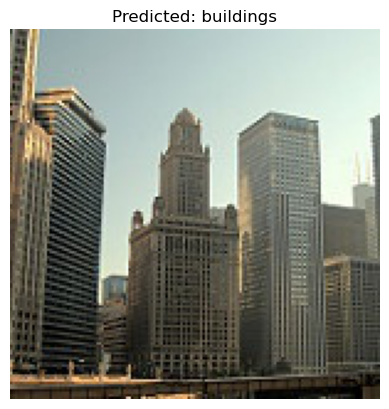

In [18]:
predictions = my_CNN_model.predict(img_array)

# For classification models, use argmax to find the class with the highest probability
predicted_class = np.argmax(predictions, axis=1)

print(f"Predicted class: {predicted_class}")

predicted_label = categories[predicted_class[0]]
print(f"Predicted label: {predicted_label}")

plt.imshow(img)
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')  # Optional: Hide axes
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Predicted class: [3]
Predicted label: mountain


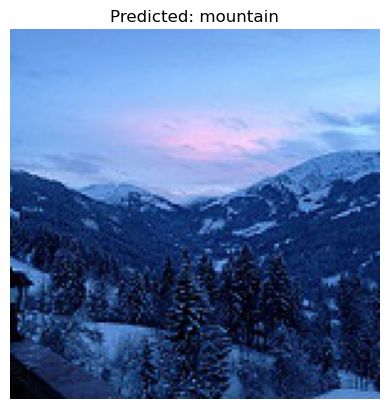

In [34]:
#Import Library

from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle


my_CNN_model = load_model('CnnModel.keras') # load model
categories = ['buildings','forest','glacier','mountain','sea','street']

img_path = r'D:\New Dataset\seg_pred\76.jpg'
img = image.load_img(img_path, target_size=(150, 150))

# Convert image to array and normalize
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Reshape for model input
img_array /= 255.0  # Normalize pixel values if needed (depends on your model's training preprocessing)

predictions = my_CNN_model.predict(img_array)

# For classification models, use argmax to find the class with the highest probability
predicted_class = np.argmax(predictions, axis=1)

print(f"Predicted class: {predicted_class}")

predicted_label = categories[predicted_class[0]]
print(f"Predicted label: {predicted_label}")

plt.imshow(img)
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')  # Optional: Hide axes
plt.show()

In [2]:
#load all predicted image

# from tensorflow.keras.preprocessing import image
# from tensorflow.keras.models import load_model
# import numpy as np
# import matplotlib.pyplot as plt
# import os
# import pickle

# folder = r'D:\New Dataset\seg_pred'

# my_CNN_model = load_model('CnnModel.keras') # load model
# categories = ['buildings','forest','glacier','mountain','sea','street']


# counter = 0;
# limit = 100

# for img_name in os.listdir(folder):
#     img_path = os.path.join(folder,img_name)
#     img = image.load_img(img_path, target_size=(150, 150))

#     # Convert image to array and normalize
#     img_array = image.img_to_array(img)
#     img_array = np.expand_dims(img_array, axis=0)  # Reshape for model input
#     img_array /= 255.0  # Normalize pixel values if needed (depends on your model's training preprocessing)
    
#     predictions = my_CNN_model.predict(img_array)
    
#     # For classification models, use argmax to find the class with the highest probability
#     predicted_class = np.argmax(predictions, axis=1)
    
#     print(f"Predicted class: {predicted_class}")
    
#     predicted_label = categories[predicted_class[0]]
#     print(f"Predicted label: {predicted_label}")
    
#     plt.imshow(img)
#     plt.title(f"Predicted: {predicted_label}")
#     plt.axis('off')  # Optional: Hide axes
#     plt.show()

#     # Increment the counter
#     counter += 1

#     # Break the loop after processing 100 images
#     if counter >= limit:
#         break
    
    